# Using Python to solve real-life problem

##### Using python script to extract the temperatures of various town centre in Singapore from http://www.weather.gov.sg/weather-currentobservations-temperature/. 

#### Inspect the weather webpage. Notice that the weather information for each town is wrap in a _span_ element with class="sgr points":

~~~
<span id="S109" class="sgr points" 
data-toggle="popover" data-placement="top" data-trigger="hover" 
data-content="<ul class='list-unstyled'><li>Location: <strong>Ang Mo Kio</strong></li></ul>" 
data-original-title="" title="" onclick="showByClickSpan('S109')" 
style="display: block; top: 188.934px; left: 407.431px;">31.0</span>
~~~

#### We going to use a poweerful librray BeautifulSoup to extract these weather info !
Install <b>BeautifulSoup</b> with: <br>
    pip install bs4

In [ ]:
# library to read a webpage and parse the information we want
import requests
from bs4 import BeautifulSoup

In [ ]:
# Get the webpage
r = requests.get("http://www.weather.gov.sg/weather-currentobservations-temperature/")

In [ ]:
# Send it to BeautifulSoup to cook
soup = BeautifulSoup(r.text, "html.parser")

In [ ]:
# Find all the span elements;  spans will be a list conatining all the spans
spans= soup.findAll('span', attrs= {'class': 'sgr points'})

In [ ]:
# How many are there?  Each represent a town
len(spans)

In [ ]:
# The text of this span is the temperatuyre
# get the temperature of the 1st town
# remember the index of 1st eleemnt of a list is 0
spans[0].text

In [ ]:
# Can you spot the name of the 1st town?
spans[0]

In [ ]:
data = spans[0]['data-content']

In [ ]:
data

#### We will use a powerful tool regular exporession to pattern match the town

In [ ]:
import re
match = re.search(r"<strong>([a-zA-Z]+)</strong>", data)
print (match.group(1))

In [ ]:
# Iterature through the list to print out the tempearures of each town
for s in spans:
    match = re.search(r"<strong>([a-zA-Z \(\)]+)</strong>",s['data-content'])    
    print ('{0:30}\t{1}'.format(match.group(1), s.text))

In [ ]:
# We can write a function to get the temperature of a specific town
def get_temperature(town: str) -> float :
    r = requests.get("http://www.weather.gov.sg/weather-currentobservations-temperature/")
    soup = BeautifulSoup(r.text, "html.parser")
    s_spans= soup.findAll('span', attrs= {'class': 'sgr points'})
    for s in s_spans:
        match = re.search(r"<strong>([a-zA-Z \(\)]+)</strong>",s['data-content'])  
        if match.group(1) == town:
            return float(s.text)
    return None

In [19]:
'''
 We make a function that return a dictionary of town/temprature pair
'''
def getSGWeather() -> dict:
    result = {}
    r = requests.get("http://www.weather.gov.sg/weather-currentobservations-temperature/")
    soup = BeautifulSoup(r.text, "html.parser")
    s_spans= soup.findAll('span', attrs= {'class': 'sgr points'})    
    for s in s_spans:
        match = re.search(r"<strong>([a-zA-Z \(\)]+)</strong>",s['data-content']) 
        result[match.group(1)] = float(s.text)
    return result 

In [ ]:
get_temperature('Clementi')

The following code is from [How to Send Emails with Gmail using Python](http://stackabuse.com/how-to-send-emails-with-gmail-using-python/)<br>With this you can send emaiul alert if value exceed a threshold <br>
[Configure your gmail account to let less secure apps use your account](https://myaccount.google.com/lesssecureapps)

In [ ]:
#Let less secure apps use your account
import smtplib

gmail_user = 'your gmail account'  
gmail_password = 'your password'

sent_from = gmail_user  
to = ['receiver email']  
subject = 'Hello World'  
body = 'Hello World\n'

email_text = """  
From: {0} 
To: {1}  
Subject: {2}

{3}
""".format (sent_from, ", ".join(to), subject, body)

try:  
    server = smtplib.SMTP_SSL('smtp.gmail.com', 465)
    server.ehlo()
    server.login(gmail_user, gmail_password)
    server.sendmail(sent_from, to, email_text)
    server.close()
except:  
    print ('Something went wrong...')

#### Write the tempatures with date-time stamp into a CSV files. The file sg-weather.csv.  You should see in your folder at Jupyter homepage. Click on on it to view.

In [16]:
import csv
from datetime import datetime# open a csv file with append, so old data will not be erased
with open('sg-weather.csv', 'a',newline='') as csv_file:
    writer = csv.writer(csv_file)
    for s in spans:
        match = re.search(r"<strong>([a-zA-Z \(\)]+)</strong>",s['data-content'])    
        writer.writerow([match.group(1), s.text, datetime.now()])

## Use pandas to plot the temperature

In [21]:
# import Pandas
import pandas as pd
%matplotlib inline

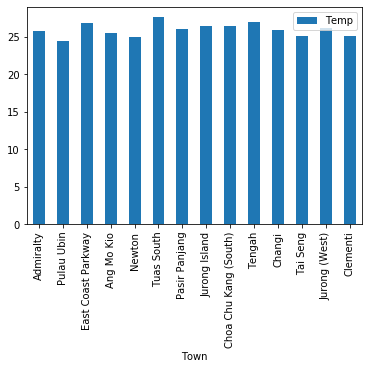

In [22]:
# w store the dictionary of town/temperature pairs returned from getSGWeather()
w = getSGWeather()
df = pd.DataFrame({'Town':list(w.keys()), 'Temp':list(w.values())})
ax = df.plot.bar(x='Town', y='Temp', rot=90)

In [23]:
df.sort_values(by=["Temp"])

,Town,Temp
1,Pulau Ubin,24.4
4,Newton,25.0
11,Tai Seng,25.1
13,Clementi,25.1
3,Ang Mo Kio,25.5
0,Admiralty,25.8
10,Changi,25.9
6,Pasir Panjang,26.1
12,Jurong (West),26.2
7,Jurong Island,26.5


In [29]:
print(f"teamparture range {df.min(axis=0).Temp} - {df.max(axis=0).Temp}")

teamparture range 24.4 - 27.6


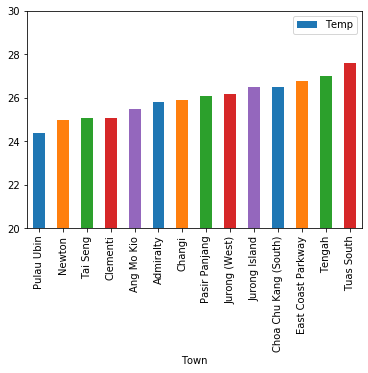

In [33]:
ax = df.sort_values(by=["Temp"]).plot.bar(x='Town', y='Temp', rot=90, ylim=[20,30], color=['C0', 'C1', 'C2', 'C3', 'C4'])